In [6]:
## Imports
from PIL import Image
import matplotlib.pyplot as plt
import praw
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import os 
from dotenv import load_dotenv
load_dotenv()

import re
import pandas as pd
from collections import Counter

# Code to download corpora
import nltk
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
## Define function used to clean text data scrapped from a subreddit

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [8]:
## Load env variables. For this script to work, you'll have to have created an agent with reddit. Go to: https://www.reddit.com/prefs/apps, or google how to create a reddit agent
## You'll need a client_id, client_secret and a user agent name. Load them up as evn variables

c_id = os.getenv("C_ID")
c_secret = os.getenv("C_SECRET")

In [9]:
## Create data frame, call reddit function, ping user for subreddit's name and scrap the top 10 post

data = []

reddit = praw.Reddit(client_id=c_id,client_secret=c_secret,user_agent="ENTER USER AGENT NAME")    

subreddit = input('Enter subreddit name:')

for submission in reddit.subreddit(subreddit).hot(limit=10):
    #print(submission.title)
    data.append(submission.title)
    for top_level_comment in submission.comments:
        data.append(top_level_comment.body)

Enter subreddit name: funny


AttributeError: 'MoreComments' object has no attribute 'body'

In [10]:
## Convert to text, clean data
text = str(data)
text_cleaned = process_text(text)

'announcement making change comic handled deleted thank like comic every comic comic really much yeah thanks something dont mind comic often quite lame drown stuff actually subbed feel like creator found random platform promote stuff change nature subnnpeople always complain rfunny isnt actually funny found gem year like restaurant promoting aidsfree food fridays see fucking problem allow often feel let know default reddit page used go rfunny however due insane amount comic longer case longer funny way kill time funny sorry let know fix ill back comic posted funny pandemic ban period let day opposed make subreddit unfunny junk non comic content eclipsed could subreddit regular find comic funny sound like censoring comic wednesdays funny honestly block people put comic made feed much better three click gone prefer comic stips reposted pic always seennjust wish able filter though reposts wa automated repost checking bot even sure thats thing top post thingsnn could thing good way convey 

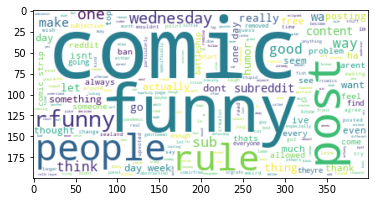

<Figure size 43200x28800 with 0 Axes>

In [11]:
## Generate word cloud and save it to the same folder as this script is in. Thank you!! and have fun smiley face

wc = WordCloud(background_color="white", max_words=3500, max_font_size=100, random_state=42)
wc.generate(text_cleaned)

plt.imshow(wc.recolor(color_func=None),vmin=1000, interpolation="bilinear")
plt.figure(figsize=(600,400))
wc.to_file('wordcloud.png')